# GLOBAL COST OF LIVING ANALYZER

#### Problem Statement

1. Analyze the cost of living in different geographical areas
2. Comparing the costs of living in different areas
3. Analyzing the most cheapest and most expensive places in the world

In [1]:
# Mathematical Calculation and Dataframe Manipulation
import numpy as np 
import pandas as pd 

# Data Visulization Libraries
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

# Visualizing maps and fetch Lattitudes & Longitudes
import folium
from folium import Circle
from geopy import Nominatim

# Value Scaling
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

In [2]:
# Importing the dataset

city = pd.read_csv('cost-of-living.csv')

In [3]:
# checking the shape of the data
city.shape

(55, 161)

In [4]:
city.head()

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.0,3.38,3.58,5.27,...,3.75,5.72,3.82,15.0,15.56,10.22,12.43,11.81,2.81,3.59
1,"Meal for 2 People, Mid-range Restaurant, Three...",29.35,15.28,12.22,65.00,20.74,60.0,17.48,22.99,23.73,...,18.76,22.01,11.47,60.0,62.24,49.54,56.55,54.37,14.06,31.45
2,McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.0,4.51,3.58,4.22,...,3.56,3.67,3.06,8.2,12.97,7.12,7.32,7.15,3.38,5.39
3,Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.0,1.69,1.02,0.84,...,1.50,1.10,2.37,4.0,7.26,5.57,5.90,4.97,1.69,1.35
4,Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.0,2.82,1.53,2.11,...,1.50,2.20,3.06,4.0,7.26,5.57,5.59,4.97,2.81,2.70


The rows are different parameters of assesment whereas the columns are different cities throughout the world.

In [5]:
# extracting latitude and longitude
locator = Nominatim(user_agent="myGeocoder")

# just for an instance to check whether the extraction is working or not, we enter a random location
location = locator.geocode("Saint Petersburg, Russia")

In [6]:
# printing the latitude and longitude extracted of the above example
print("Latitude = {}, Longitude = {}" .format(location.latitude, location.longitude))

Latitude = 59.938732, Longitude = 30.316229


#### Now our aim is to store every location in a variable so that we can extract their latitude and longitutde. For this we transpose our data frame so that Locations that were before a single column become rows

In [7]:
city=city.T
# Transposing the dataframe, so that the columns become the rows and the rows become the columns

In [8]:
city.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
Unnamed: 0,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three...",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red M...,Toyota Corolla 1.6l 97kW Comfort (Or Equivalen...,"Preschool (or Kindergarten), Full Day, Private...","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41
"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,2.02,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0


In [9]:
city.rename(columns=city.iloc[0], inplace = True)
city.drop(city.index[0], inplace = True)
city.head()

,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41
"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,2.02,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0
"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.3


In [10]:
# we don't want location to be our index
city = city.reset_index()

# renaming the index column to location
city = city.rename(columns={'index': 'Location'})
city.head()

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41
3,"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.3


In [11]:
city.columns

Index(['Location', 'Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Cen

In [12]:
import warnings
warnings.filterwarnings('ignore')

from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

In [13]:
# Using Nominatim we can extract the latitude and longitutde of only one region at a time
# Therefore we use Ratelimiter to extract the latitude and longitude of all the regions together

# 2 - create location column
city['location'] = city['Location'].apply(geocode)

# 3 - create longitude, latitude and altitude from location column (returns tuple)
city['point'] = city['location'].apply(lambda loc: tuple(loc.point) if loc else None)

# 4 - split point column into latitude, longitude and altitude columns
city[['latitude', 'longitude', 'altitude']] = pd.DataFrame(city['point'].tolist(), index=city.index)

# lets check the head of the data set
city.head()

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",location,point,latitude,longitude,altitude
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,...,0.48,7.18,19305.29,411.83,5388.86,"(Санкт-Петербург, Северо-Западный федеральный ...","(59.938732, 30.316229, 0.0)",59.938732,30.316229,0.0
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,0.62,9.73,20874.72,282.94,6905.43,"(İstanbul, Fatih, İstanbul, Marmara Bölgesi, 3...","(41.0096334, 28.9651646, 0.0)",41.009633,28.965165,0.0
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,0.58,8.61,20898.83,212.18,4948.41,"(İzmir, Konak, İzmir, Ege Bölgesi, 35180, Türk...","(38.4147331, 27.1434119, 0.0)",38.414733,27.143412,0.0
3,"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,...,1.25,12.34,24402.77,351.6,1641.0,"(Helsinki, Helsingin seutukunta, Uusimaa, Etel...","(60.1674881, 24.9427473, 0.0)",60.167488,24.942747,0.0
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.59,5.37,17238.13,210.52,2679.3,"(Chișinău, Sectorul Buiucani, Municipiul Chiși...","(47.0245117, 28.8322923, 0.0)",47.024512,28.832292,0.0


In [14]:
# removing unnecessary columns from the data
city = city.drop(['location', 'point', 'altitude'], axis = 1)

# checking the updated column list
city.columns

Index(['Location', 'Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Cen

#### Agregating all these items and creating new features

In [15]:
def food(city):
    return int(round((city[['Meal, Inexpensive Restaurant',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'Chicken Breasts (Boneless, Skinless), (1kg)', 'Apples (1kg)', 'Oranges (1kg)',
       'Potato (1kg)', 'Lettuce (1 head)', 'Cappuccino (regular)',
       'Rice (white), (1kg)', 'Tomato (1kg)', 'Banana (1kg)', 'Onion (1kg)',
       'Beef Round (1kg) (or Equivalent Back Leg Red Meat)',]].mean()).mean()))

def travel(city):
    return int(round((city[['One-way Ticket (Local Transport)',
                            'Monthly Pass (Regular Price)', 'Gasoline (1 liter)',
                           'Taxi Start (Normal Tariff)', 'Taxi 1km (Normal Tariff)',
                           'Taxi 1hour Waiting (Normal Tariff)',]].mean()).mean()))

def living(city):
    return int(round((city[[ 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Centre',
       'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment',
         'Price per Square Meter to Buy Apartment in City Centre',
       'Price per Square Meter to Buy Apartment Outside of Centre',
        'Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car)',]].mean()).mean()))

def lifestyle(city):
    return int(round((city[['1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)',
       'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)',
       'Fitness Club, Monthly Fee for 1 Adult',
       'Tennis Court Rent (1 Hour on Weekend)',
       'Cinema, International Release, 1 Seat',
       '1 Pair of Jeans (Levis 501 Or Similar)',
       '1 Summer Dress in a Chain Store (Zara, H&M, ...)',
       '1 Pair of Nike Running Shoes (Mid-Range)',
       '1 Pair of Men Leather Business Shoes', 
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',]].mean()).mean()))

def education(city):
    return int(round((city[['Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child',
       'International Primary School, Yearly for 1 Child',]].mean()).mean()))

def income(city):
    return int(round((city[['Average Monthly Net Salary (After Tax)',
       'Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate',]].mean()).mean()))

In [16]:
city['Food'] = city.apply(food, axis = 1)
city['Travel'] = city.apply(travel, axis = 1)
city['Living'] = city.apply(living, axis = 1)
city['Lifestyle'] = city.apply(lifestyle, axis = 1)
city['Education'] = city.apply(education, axis = 1)
city['Income'] = city.apply(income, axis = 1)

In [17]:
city.head()

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",latitude,longitude,Food,Travel,Living,Lifestyle,Education,Income
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,...,411.83,5388.86,59.938732,30.316229,2,8,5020,34,2900,328
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,282.94,6905.43,41.009633,28.965165,2,6,5409,23,3594,228
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,212.18,4948.41,38.414733,27.143412,2,5,5297,19,2580,207
3,"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,...,351.6,1641.0,60.167488,24.942747,4,20,6985,44,996,1192
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,210.52,2679.3,47.024512,28.832292,2,2,4040,32,1445,148


In [18]:
# Splitting the country names from the locations column
# For instance lets try the split function on the 0th index

city['Location'].str.split(', ')[0]

['Saint Petersburg', 'Russia']

In [19]:
# applying the same function on whole dataset
city['country'] = city['Location'].str.split(', ')

# storing the second one in the country column
city['Country'] = city['country'].apply(lambda x: x[1])

# lets check the values in the country column
city['Country'].value_counts()

India             11
Canada             8
Poland             6
Romania            5
Australia          5
                  ..
Peru               1
Taiwan             1
United Kingdom     1
Malaysia           1
Tunisia            1
Name: Country, Length: 90, dtype: int64

### Comparing Lifestyle in different countries

In [20]:
# We use the groupby function on the Countries with lifestyle factors

city[['Country', 'Food', 'Travel', 'Living', 'Lifestyle', 'Education', 'Income']].groupby(['Country']).agg('mean').style.background_gradient(cmap = 'Wistia')

,Food,Travel,Living,Lifestyle,Education,Income
Country,,,,,,
AZ,4.000000,16.000000,5114.000000,35.000000,7088.000000,1559.000000
Albania,2.000000,5.000000,4157.000000,29.000000,1225.000000,171.000000
Argentina,2.000000,3.000000,4346.000000,28.000000,1638.000000,266.000000
Armenia,2.000000,3.000000,4390.000000,30.000000,1581.000000,154.000000
Australia,4.400000,21.600000,4932.200000,38.600000,5919.400000,1400.800000
Austria,4.000000,14.000000,6662.000000,40.000000,8124.000000,951.000000
Azerbaijan,2.000000,2.000000,4164.000000,32.000000,2933.000000,151.000000
Belarus,2.000000,3.000000,3932.000000,33.000000,2874.000000,224.000000
Belgium,4.000000,15.000000,5773.000000,42.000000,9519.000000,1146.000000


☝️ As seen above, countries with darker shades of yellow, represent more cost.

### 'Top N' and 'Bottom N' Analysis

Top 5 most expensive countries for Food, Travelling, Living, Lifestyle, and everything in general

##### - TOP 5 MOST EXPENSIVE COUNTRIES

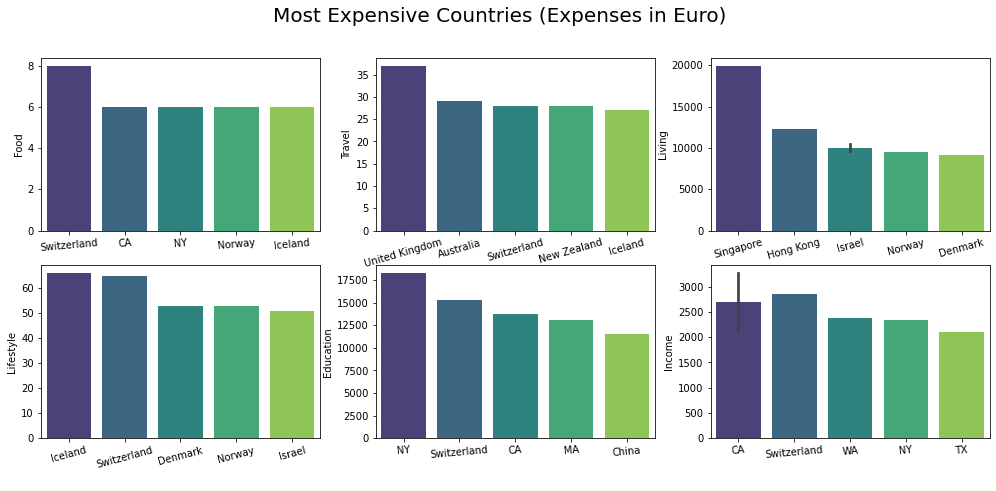

In [21]:
# Let's check out the Top 5 Most Expensive Countries in all above domains
plt.rcParams['figure.figsize'] = (17, 7)

plt.subplot(2, 3, 1)
x = city[['Country','Food']].sort_values(by = 'Food', ascending = False).head(5)
sns.barplot(x['Country'], x['Food'], palette = 'viridis')
plt.xticks(rotation = 5)
plt.xlabel(' ')

plt.subplot(2, 3, 2)
x = city[['Country','Travel']].sort_values(by = 'Travel', ascending = False).head(5)
sns.barplot(x['Country'], x['Travel'], palette = 'viridis')
plt.xticks(rotation = 16)
plt.xlabel(' ')

plt.subplot(2, 3, 3)
x = city[['Country','Living']].sort_values(by = 'Living', ascending = False).head(6)
sns.barplot(x['Country'], x['Living'], palette = 'viridis')
plt.xticks(rotation = 15)
plt.xlabel(' ')

plt.subplot(2, 3, 4)
x = city[['Country','Lifestyle']].sort_values(by = 'Lifestyle', ascending = False).head(5)
sns.barplot(x['Country'], x['Lifestyle'], palette = 'viridis')
plt.xticks(rotation = 15)
plt.xlabel(' ')

plt.subplot(2, 3, 5)
x = city[['Country','Education']].sort_values(by = 'Education', ascending = False).head(5)
sns.barplot(x['Country'], x['Education'], palette = 'viridis')
plt.xticks(rotation = 5)
plt.xlabel(' ')

plt.subplot(2, 3, 6)
x = city[['Country','Income']].sort_values(by = 'Income', ascending = False).head(6)
sns.barplot(x['Country'], x['Income'], palette = 'viridis')
plt.xticks(rotation = 5)
plt.xlabel(' ')

plt.suptitle('Most Expensive Countries (Expenses in Euro)', fontsize = 20)
plt.show()

##### - TOP 5 LEAST EXPENSIVE COUNTRIES

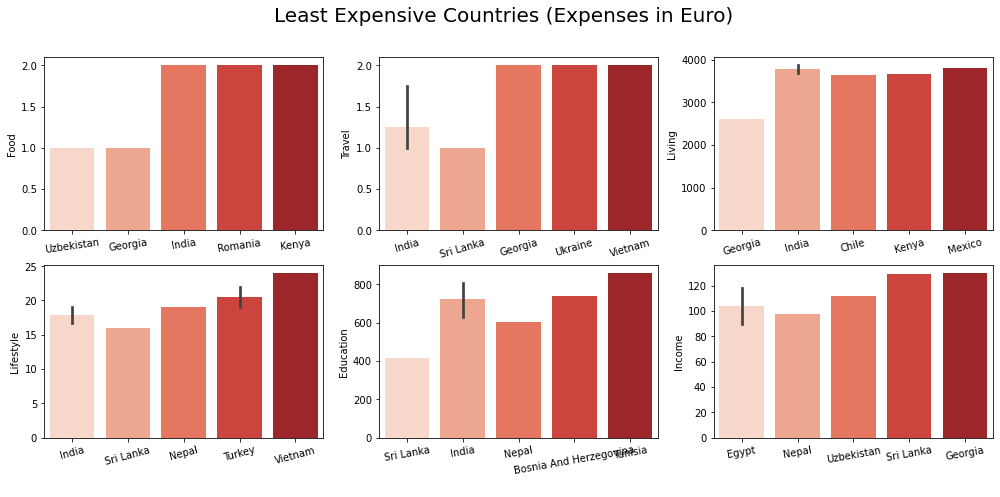

In [22]:
# Let's check out the Top 5 Least Expensive Countries in all above domains
plt.rcParams['figure.figsize'] = (17, 7)

plt.subplot(2, 3, 1)
x = city[['Country','Food']].sort_values(by = 'Food', ascending = True).head(5)
sns.barplot(x['Country'], x['Food'], palette = 'Reds')
plt.xticks(rotation = 8)
plt.xlabel(' ')

plt.subplot(2, 3, 2)
x = city[['Country','Travel']].sort_values(by = 'Travel', ascending = True).head(9)
sns.barplot(x['Country'], x['Travel'], palette = 'Reds')
plt.xticks(rotation = 16)
plt.xlabel(' ')

plt.subplot(2, 3, 3)
x = city[['Country','Living']].sort_values(by = 'Living', ascending = True).head(9)
sns.barplot(x['Country'], x['Living'], palette = 'Reds')
plt.xticks(rotation = 15)
plt.xlabel(' ')

plt.subplot(2, 3, 4)
x = city[['Country','Lifestyle']].sort_values(by = 'Lifestyle', ascending = True).head(18)
sns.barplot(x['Country'], x['Lifestyle'], palette = 'Reds')
plt.xticks(rotation = 15)
plt.xlabel(' ')

plt.subplot(2, 3, 5)
x = city[['Country','Education']].sort_values(by = 'Education', ascending = True).head(9)
sns.barplot(x['Country'], x['Education'], palette = 'Reds')
plt.xticks(rotation = 10)
plt.xlabel(' ')

plt.subplot(2, 3, 6)
x = city[['Country','Income']].sort_values(by = 'Income', ascending = True).head(6)
sns.barplot(x['Country'], x['Income'], palette = 'Reds')
plt.xticks(rotation = 10)
plt.xlabel(' ')

plt.suptitle('Least Expensive Countries (Expenses in Euro)', fontsize = 20)
plt.show()

### Performing Geospatial Analysis

Includes techniques which studies entities using their topological, or geographical properties.

In [23]:
top_range = (city.describe().loc['min',:]/city.describe().loc['max', :]).sort_values().index[2:22]
list(top_range)

['Education', 'Travel', 'Income', 'Food', 'Living', 'Lifestyle']

In [24]:
def color_producer(val):
    if val <= city[item].quantile(.25):
        return 'forestgreen'
    elif val <= city[item].quantile(.50):
        return 'goldenrod'
    elif val <= city[item].quantile(.75):
        return 'darked'
    else:
        return 'red'

### Making a bubble map to the base map using folium

<b> 1) Bubble Map comparing expenses of Education across the world </b>

In [25]:
map = folium.Map(location=[city['latitude'].mean(), city['longitude'].mean()],
                tiles='Stamen Terrain',
                zoom_start = 2)
item = top_range[0]

# Add a bubble map to the base map
for i in range(0, len(city)):
    Circle(
    location=[city.iloc[i]['latitude'], city.iloc[i]['longitude']],
    radius = 120000,
    color = color_producer(city.iloc[i][item])).add_to(map)
    
print ('Price of: ', item)
map

Price of:  Education


<b> 2) Bubble Map comparing expenses of Travel across the world </b>

In [26]:
map = folium.Map(location=[city['latitude'].mean(), city['longitude'].mean()], tiles = 'CartoDB dark_matter', zoom_start=2)
item = top_range[1]

for i in range(0, len(city)):
    Circle(
    location=[city.iloc[i]['latitude'], city.iloc[i]['longitude']],
    radius = 120000,
    color = color_producer(city.iloc[i][item])).add_to(map)
    
print ('Price of: ', item)
map

Price of:  Travel


<b> 3) Bubble Map comparing Incomes of people across the world </b>

In [27]:
map = folium.Map(location=[city['latitude'].mean(), city['longitude'].mean()], tiles = 'CartoDB dark_matter', zoom_start=2)
item = top_range[2]

for i in range(0, len(city)):
    Circle(
    location=[city.iloc[i]['latitude'], city.iloc[i]['longitude']],
    radius = 120000,
    color = color_producer(city.iloc[i][item])).add_to(map)
    
print ('Price of: ', item)
map

Price of:  Income


<b> 4) Bubble Map comparing Food Expenses across the world </b>

In [28]:
map = folium.Map(location=[city['latitude'].mean(), city['longitude'].mean()], tiles = 'CartoDB dark_matter', zoom_start=2)
item = top_range[3]

for i in range(0, len(city)):
    Circle(
    location=[city.iloc[i]['latitude'], city.iloc[i]['longitude']],
    radius = 120000,
    color = color_producer(city.iloc[i][item])).add_to(map)
    
print ('Price of: ', item)
map

Price of:  Food


<b> 5) Bubble Map comparing Prices of Living of people across the world </b>

In [29]:
map = folium.Map(location=[city['latitude'].mean(), city['longitude'].mean()], tiles = 'CartoDB dark_matter', zoom_start=2)
item = top_range[4]

for i in range(0, len(city)):
    Circle(
    location=[city.iloc[i]['latitude'], city.iloc[i]['longitude']],
    radius = 120000,
    color = color_producer(city.iloc[i][item])).add_to(map)
    
print ('Price of: ', item)
map

Price of:  Living


<b> 6) Bubble Map comparing Lifestyles of people across the world </b>

In [30]:
map = folium.Map(location=[city['latitude'].mean(), city['longitude'].mean()], tiles = 'CartoDB dark_matter', zoom_start=2)
item = top_range[5]

for i in range(0, len(city)):
    Circle(
    location=[city.iloc[i]['latitude'], city.iloc[i]['longitude']],
    radius = 120000,
    color = color_producer(city.iloc[i][item])).add_to(map)
    
print ('Price of: ', item)
map

Price of:  Lifestyle


### Ruling out relationships between different factors

For this, we would have to plot a heatmap

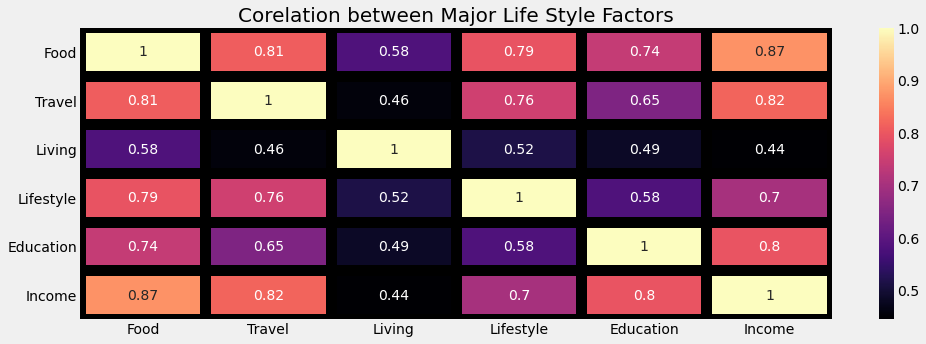

In [31]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.heatmap(city[['Food', 'Travel', 'Living', 'Lifestyle', 'Education', 'Income']].corr(), 
            cmap = 'magma', annot = True, linecolor='black', linewidths = 10)
plt.title('Corelation between Major Life Style Factors', fontsize = 20)
plt.show()

### Comparing Lifestyles and other Factors of Popular Countries

In [32]:
city[(city['Country'] == 'United Kingdom') | (city['Country'] == 'Canada') | (city['Country'] == 'Australia') | 
     (city['Country'] == 'Germany') | (city['Country'] == 'China') | 
    (city['Country'] == 'Russia')][['Location','Food', 
                'Travel','Living','Lifestyle','Education',
                    'Income']].set_index('Location').sort_values(by = 'Income',
                                ascending = False).style.background_gradient(cmap = 'copper')

,Food,Travel,Living,Lifestyle,Education,Income
Location,,,,,,
"Brisbane, Australia",5,22,4644,39,4910,1517
"Sydney, Australia",5,29,5781,42,6661,1511
"Calgary, Canada",4,17,4747,36,5599,1480
"Ottawa, Canada",4,17,4818,39,4911,1454
"Melbourne, Australia",4,21,5218,39,7062,1398
"London, United Kingdom",4,37,9069,42,11423,1380
"Adelaide, Australia",4,16,4309,34,4606,1329
"Munich, Germany",4,17,7445,44,5867,1315
"Vancouver, Canada",5,16,6153,38,7471,1315


### Comparing Lifestyles and other Factors of Indian Citites

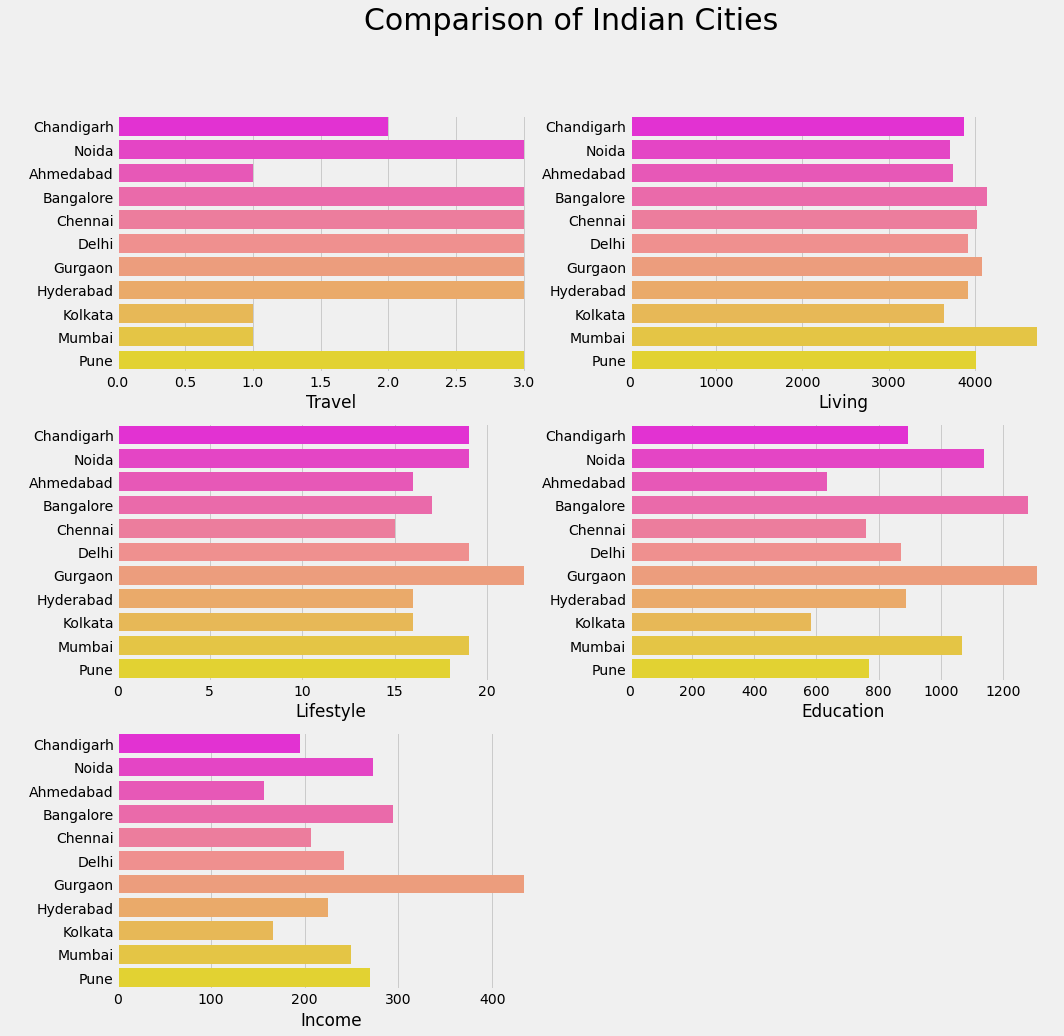

In [33]:
# plotting Indian Cities to understand them better
city['City'] = city['Location'].str.split(', ')
city['City'] = city['City'].apply(lambda x: x[0])

x = city[city['Country'] == 'India']

plt.rcParams['figure.figsize'] = (15, 15)
plt.subplot(3, 2, 1)
sns.barplot(y = x['City'], x = x['Travel'], palette = 'spring')
plt.ylabel(" ")

plt.subplot(3, 2, 2)
sns.barplot(y = x['City'], x = x['Living'], palette = 'spring')
plt.ylabel(" ")

plt.subplot(3, 2, 3)
sns.barplot(y = x['City'], x = x['Lifestyle'], palette = 'spring')
plt.ylabel(" ")

plt.subplot(3, 2, 4)
sns.barplot(y = x['City'], x = x['Education'], palette = 'spring')
plt.ylabel(" ")

plt.subplot(3, 2, 5)
sns.barplot(y = x['City'], x = x['Income'], palette = 'spring')
plt.ylabel(" ")

plt.suptitle('Comparison of Indian Cities', fontsize = 30)
plt.show()

### List of most expensive countries to live in

In [34]:
x = city[['Food','Travel','Living','Lifestyle','Education','Income']]
mm = MinMaxScaler()
data = mm.fit_transform(x)
data = pd.DataFrame(data)
data.columns = x.columns
data.head()

,Food,Travel,Living,Lifestyle,Education,Income
0,0.142857,0.194444,0.139139,0.372549,0.139049,0.074890
1,0.142857,0.138889,0.161588,0.156863,0.177913,0.043424
2,0.142857,0.111111,0.155125,0.078431,0.121129,0.036816
3,0.428571,0.527778,0.252539,0.568627,0.032424,0.346759
4,0.142857,0.027778,0.082583,0.333333,0.057568,0.018250


In [35]:
data['Total Score'] = (data['Food'] + data['Travel'] + data['Living'] + 
                       data['Lifestyle'] + data['Education'] + data['Income'])/6

# concat city
cities = city[['City', 'Country']]
data = pd.concat([data, cities], axis = 1)
# lets sort the values
print("Most Expensive Places in the World: \n")
data[['Country','City','Total Score']].sort_values(by = 'Total Score', ascending = False).head(10)

Most Expensive Places in the World: 



,Country,City,Total Score
144,Switzerland,Zurich,0.790375
78,NY,New York,0.670422
100,CA,San Francisco,0.660000
39,Singapore,Singapore,0.576437
70,United Kingdom,London,0.558841
128,Iceland,Reykjavik,0.557198
102,WA,Seattle,0.539670
50,Norway,Oslo,0.534259
47,MA,Boston,0.525962
71,CA,Los Angeles,0.487471


### List of least expensive countries to live in

In [36]:
print("Cheapest Places in the World :\n")
data[['Country','City','Total Score']].sort_values(by = 'Total Score', ascending = True).head(10)

Cheapest Places in the World :



,Country,City,Total Score
123,India,Kolkata,0.042501
106,India,Ahmedabad,0.043629
112,India,Chennai,0.056045
63,Georgia,Tbilisi,0.057976
118,India,Hyderabad,0.060394
81,India,Chandigarh,0.063713
130,India,Pune,0.069141
82,Sri Lanka,Colombo,0.069626
114,India,Delhi,0.070959
127,India,Mumbai,0.071562


### Analysing Cost of Essential Items

In [37]:
city.columns

Index(['Location', 'Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Cen

In [38]:
# We know that the Most common things in day to day life are
# Internet, Basic Food ItemS such as Eggs, Milk, Breads, Electricity and Water, Taxi Travel

x = city[['Country','City','Milk (regular), (1 liter)',
         'Eggs (regular) (12)', 'Loaf of Fresh White Bread (500g)',
         'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)',
         'Taxi 1km (Normal Tariff)',
         'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment',
          ]]

# lets rename these columns
x = x.rename(columns = {'Milk (regular), (1 liter)':'Milk','Eggs (regular) (12)':'Eggs', 
                       'Loaf of Fresh White Bread (500g)': 'Bread',
                       'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)': 'Internet',
                       'Taxi 1km (Normal Tariff)':'Taxi Travel',
                       'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment':'Electricity and Water'})
x.head()

,Country,City,Milk,Eggs,Bread,Internet,Taxi Travel,Electricity and Water
0,Russia,Saint Petersburg,0.98,1.18,0.71,6.96,0.26,102.17
1,Turkey,Istanbul,0.71,1.62,0.36,14.2,0.47,59.33
2,Turkey,Izmir,0.65,1.51,0.38,12.89,0.57,51.07
3,Finland,Helsinki,0.96,2.02,2.27,22.31,1.0,82.66
4,Moldova,Chisinau,0.68,1.11,0.33,8.58,0.18,113.46


In [39]:
x.dtypes

Country                  object
City                     object
Milk                     object
Eggs                     object
Bread                    object
Internet                 object
Taxi Travel              object
Electricity and Water    object
dtype: object

In [40]:
x[['Milk','Bread','Eggs','Internet','Taxi Travel','Electricity and Water']].astype('float').describe()

,Milk,Bread,Eggs,Internet,Taxi Travel,Electricity and Water
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.998938,1.197875,1.902812,29.660875,0.922250,107.106125
std,0.391720,0.760670,0.752520,18.908249,0.709011,51.553830
min,0.390000,0.100000,0.750000,4.440000,0.140000,18.560000
25%,0.710000,0.555000,1.377500,12.832500,0.405000,63.860000
50%,0.895000,1.020000,1.850000,26.615000,0.630000,102.465000
75%,1.170000,1.690000,2.352500,43.317500,1.350000,145.707500
max,2.640000,3.330000,5.330000,93.290000,4.160000,265.520000


In [41]:
plt.rcParams['figure.figsize'] = (10, 3)
# lets check those Countries where Milk is very Expensive
print(x[x['Milk'] > 1.17][['Country','City','Milk']].sort_values(by = 'Milk',
                                    ascending = False).head(5).set_index('Country'))

print('\n')
# lets check those Countries where Bread is very Expensive
print(x[x['Bread'] > 1.69][['Country','City','Bread']].sort_values(by = 'Bread',
                                    ascending = False).head(5).set_index('Country'))

print('\n')
# lets check those Countries where Bread is very Expensive
print(x[x['Eggs'] > 2.35][['Country','City','Eggs']].sort_values(by = 'Eggs',
                                    ascending = False).head(5).set_index('Country'))

print('\n')
# lets check those Countries where Bread is very Expensive
print(x[x['Internet'] > 43.37][['Country','City','Internet']].sort_values(by = 'Internet',
                                    ascending = False).head(5).set_index('Country'))

print('\n')
# lets check those Countries where Bread is very Expensive
print(x[x['Taxi Travel'] > 1.35][['Country','City','Taxi Travel']].sort_values(by = 'Taxi Travel',
                                    ascending = False).head(5).set_index('Country'))

print('\n')
# lets check those Countries where Bread is very Expensive
print(x[x['Electricity and Water'] > 145.7][['Country','City',
                        'Electricity and Water']].sort_values(by = 'Electricity and Water',
                                    ascending = False).head(5).set_index('Country'))

                  City  Milk
Country                     
Taiwan          Taipei  2.64
Hong Kong    Hong Kong  2.54
China         Shanghai  2.39
Singapore    Singapore  2.04
South Korea      Seoul  1.95


                  City Bread
Country                     
NY            New York  3.33
CA           San Diego  3.27
CA       San Francisco  3.12
CA         Los Angeles  2.99
Norway            Oslo  2.92


                  City  Eggs
Country                     
Switzerland     Zurich  5.33
Iceland      Reykjavik   4.8
Norway            Oslo  3.79
France           Paris   3.4
Israel       Jerusalem  3.32


                           City Internet
Country                                 
United Arab Emirates  Abu Dhabi    93.29
United Arab Emirates      Dubai    90.42
Qatar                      Doha    78.31
AZ                      Phoenix    67.23
Costa Rica             San Jose     65.3


                             City Taxi Travel
Country                                      
Swit

### Analyzing Quality of Life

In [42]:
life = pd.read_csv('movehubqualityoflife.csv')
life.head()

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65
3,Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13
4,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86


In [43]:
# analyzing the factors describing quality of life
life.describe()

,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,79.676713,46.477176,66.442824,45.240370,59.994537,41.338611
std,6.501011,20.614519,14.416412,25.369741,22.019376,16.416409
min,59.880000,6.380000,20.830000,0.000000,5.290000,9.110000
25%,75.070000,28.815000,59.420000,24.410000,42.752500,29.375000
50%,81.060000,49.220000,67.685000,37.210000,65.150000,41.140000
75%,84.020000,61.607500,77.207500,67.675000,78.617500,51.327500
max,100.000000,91.850000,95.960000,92.420000,97.910000,85.700000


In [44]:
# Analyzing the Quality of Life

print('Cities having Best Quality of life')
display(life[['City','Quality of Life']].sort_values(by = 'Quality of Life',
                            ascending = False).head(10).set_index('City').style.background_gradient(cmap = 'Reds'))

print('Cities having Worst Quality of life')
display(life[['City','Quality of Life']].sort_values(by = 'Quality of Life',
                            ascending = True).head(10).set_index('City').style.background_gradient(cmap = 'Reds'))

Cities having Best Quality of life


,Quality of Life
City,
Zurich,97.910000
Canberra,93.050000
Adelaide,91.540000
Berlin,91.170000
Aachen,90.520000
Stuttgart,90.400000
Dresden,90.210000
Munich,90.080000
Edmonton,89.580000


Cities having Worst Quality of life


,Quality of Life
City,
Hanoi,5.290000
Caracas,8.610000
Manila,13.140000
Dhaka,13.480000
Tehran,14.330000
Nairobi,14.360000
Jakarta,15.660000
Baku,17.200000
Cairo,17.250000


In [45]:
# Analyzing the heath care of cities

print('Cities having Best Health care Facility')
display(life[['City','Health Care']].sort_values(by = 'Health Care',
                            ascending = False).head(10).set_index('City').style.background_gradient(cmap = 'Greens'))

print('Cities having Worst Health care Facility')
display(life[['City', 'Health Care']].sort_values(by = 'Health Care',
                            ascending = True).head(10).set_index('City').style.background_gradient(cmap = 'Greens'))

Cities having Best Health care Facility


,Health Care
City,
Bangkok,95.960000
Canberra,91.900000
Pattaya,91.460000
Glasgow,90.550000
Taipei,88.890000
Brisbane,88.890000
Bristol,88.890000
Lyon,88.650000
Munich,88.430000


Cities having Worst Health care Facility


,Health Care
City,
Dhaka,20.830000
Hanoi,20.830000
Gaborone,27.780000
Baku,28.700000
Kolkata,31.290000
Indore,31.340000
Quito,32.410000
Belfast,33.330000
Kharkiv,35.060000


In [46]:
# Analyzing the Crime Rate

print('Cities having Highest Crime Rate')
display(life[['City','Crime Rating']].sort_values(by = 'Crime Rating',
                            ascending = False).head(10).set_index('City').style.background_gradient(cmap = 'bone'))

print('Cities having Worst Health care Facility')
display(life[['City', 'Crime Rating']].sort_values(by = 'Crime Rating',
                            ascending = True).head(10).set_index('City').style.background_gradient(cmap = 'bone'))

Cities having Highest Crime Rate


,Crime Rating
City,
Caracas,85.700000
Johannesburg,83.930000
Fortaleza,78.650000
Saint Louis,78.130000
Mexico City,77.860000
Detroit,76.690000
Porto Alegre,76.460000
Noida,75.000000
Karachi,74.360000


Cities having Worst Health care Facility


,Crime Rating
City,
Malaga,9.110000
Marbella,9.110000
Abu Dhabi,10.860000
Tokyo,13.910000
Munich,15.340000
Aachen,15.340000
Dusseldorf,15.340000
Dresden,15.340000
Zurich,15.350000


# Recommending better cities to Live

In [47]:
def recommend_better_cities(citi, factor = 'Lifestyle'):
    x = city[['City','Food','Education','Lifestyle','Travel', 'Income']]
    food = x[x['City'] == citi]['Food']
    edu = x[x['City'] == citi]['Education']
    life = x[x['City'] == citi]['Lifestyle']
    travel = x[x['City'] == citi]['Travel']
    income = x[x['City'] == citi]['Income']
    best_cities = x[(x['Food'] <= food.values[0]) & (x['Education'] <= edu.values[0]) & 
                   (x['Lifestyle'] <= life.values[0]) & (x['Travel'] <= travel.values[0]) &
                   (x['Income'] > income.values[0])]
    best = best_cities.sort_values(by = factor, ascending = False).head(10)
    return best['City'].reset_index(drop = True)

In [50]:
recommend_better_cities('Perth')

0      Ottawa
1     Calgary
2    Edmonton
3    Adelaide
Name: City, dtype: object